In [1]:
import requests
import networkx as nx
from pathlib import Path

# URLs
URL_NODES = "https://nus-st5225.netlify.app/assignment_1/A3bk6832/graph_nodes.txt"
URL_EDGES = "https://nus-st5225.netlify.app/assignment_1/A3bk6832/graph_edges.txt"

# Local candidates
LOCAL_NODES = Path("graph_nodes.txt")
LOCAL_EDGES = Path("graph_edges.txt")
DATA_NODES = Path("data/graph_nodes.txt")
DATA_EDGES = Path("data/graph_edges.txt")

# Load nodes: try URL -> local -> data/
try:
    resp = requests.get(URL_NODES, timeout=5)
    resp.raise_for_status()
    nodes_text = resp.text
    print(f"Loaded nodes from URL: {URL_NODES}")
except Exception:
    try:
        nodes_text = LOCAL_NODES.read_text(encoding="utf-8")
        print(f"Loaded nodes from local path: {LOCAL_NODES}")
    except FileNotFoundError:
        try:
            nodes_text = DATA_NODES.read_text(encoding="utf-8")
            print(f"Loaded nodes from local path: {DATA_NODES}")
        except FileNotFoundError:
            raise FileNotFoundError(
                f"Could not load nodes from URL or local files: {LOCAL_NODES} or {DATA_NODES}"
            )

# Load edges: try URL -> local -> data/
try:
    resp = requests.get(URL_EDGES, timeout=5)
    resp.raise_for_status()
    edges_text = resp.text
    print(f"Loaded edges from URL: {URL_EDGES}")
except Exception:
    try:
        edges_text = LOCAL_EDGES.read_text(encoding="utf-8")
        print(f"Loaded edges from local path: {LOCAL_EDGES}")
    except FileNotFoundError:
        try:
            edges_text = DATA_EDGES.read_text(encoding="utf-8")
            print(f"Loaded edges from local path: {DATA_EDGES}")
        except FileNotFoundError:
            raise FileNotFoundError(
                f"Could not load edges from URL or local files: {LOCAL_EDGES} or {DATA_EDGES}"
            )

# Build undirected graph and attach node attribute 'age'
G = nx.Graph()
for line in nodes_text.splitlines():
    line = line.strip()
    if not line or line.startswith("#"):
        continue
    nid, age = map(int, line.split())
    G.add_node(nid, age=age)

for line in edges_text.splitlines():
    line = line.strip()
    if not line or line.startswith("#"):
        continue
    u, v = map(int, line.split())
    G.add_edge(u, v)

# Should give "Graph with 1000 nodes and 25087 edges"
print(G)

Loaded nodes from URL: https://nus-st5225.netlify.app/assignment_1/A3bk6832/graph_nodes.txt
Loaded edges from URL: https://nus-st5225.netlify.app/assignment_1/A3bk6832/graph_edges.txt
Graph with 1000 nodes and 25087 edges


In [12]:
import networkx as nx

# Assume G is your NetworkX graph

# 1. Number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# 2. Average degree
num_edges = G.number_of_edges()

# For undirected graph: average degree = 2m / n
# For directed graph: average degree = m*2 / n if counting in+out
if G.is_directed():
    avg_degree = (num_edges * 2) / num_nodes   # in-degree + out-degree average
else:
    avg_degree = (num_edges * 2) / num_nodes

print("Average degree:", avg_degree)

# 3. Whether directed
print("Is directed?:", G.is_directed())

# 4. Edge density
density = nx.density(G)
print("Edge density:", density)


Number of nodes: 1000
Average degree: 50.174
Is directed?: False
Edge density: 0.05022422422422423


Max degree: 83
Min degree: 17
Nodes with max degree: [607]
Nodes with min degree: [405]


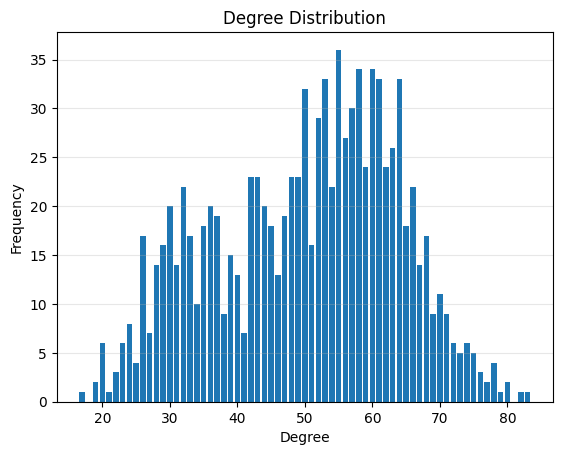

Age(s) of node(s) with highest degree:
Node 607: age = 59


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Calculate degrees for all nodes ---
# Returns a dict: {node: degree}
degree_dict = dict(G.degree())

# List of degrees
degrees = list(degree_dict.values())

# --- 2. Max and min degree ---
max_degree = max(degrees)
min_degree = min(degrees)

print(f"Max degree: {max_degree}")
print(f"Min degree: {min_degree}")

# (Optional) nodes that achieve max/min degree
nodes_with_max_degree = [n for n, d in degree_dict.items() if d == max_degree]
nodes_with_min_degree = [n for n, d in degree_dict.items() if d == min_degree]

print(f"Nodes with max degree: {nodes_with_max_degree}")
print(f"Nodes with min degree: {nodes_with_min_degree}")

# --- 3. Histogram of degree distribution ---
plt.figure()
plt.hist(degrees, bins=range(min_degree, max_degree + 2), align='left', rwidth=0.8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.grid(axis="y", alpha=0.3)
plt.show()

# --- 4. Age of the node(s) with highest degree ---
# If multiple nodes share the highest degree, we can inspect all of them
print("Age(s) of node(s) with highest degree:")
for n in nodes_with_max_degree:
    age = G.nodes[n].get("age", None)  # None if 'age' not set
    print(f"Node {n}: age = {age}")


In [4]:
import networkx as nx

# Assume:
# - G is a NetworkX graph
# - each node has an "age" attribute, e.g. G.add_node(i, age=23)

# --- 1. Degree assortativity (degree–degree correlation) ---
degree_assort = nx.degree_assortativity_coefficient(G)
print("Degree assortativity:", degree_assort)

# --- 2. Age assortativity ---

# (A) If you treat age as a categorical attribute:
age_assort_cat = nx.attribute_assortativity_coefficient(G, "age")
print("Age assortativity (categorical):", age_assort_cat)


Degree assortativity: 0.25720731284047177
Age assortativity (categorical): 0.009296184908124153


In [5]:
import networkx as nx

# Assume:
# - G is a NetworkX graph
# - each node may have an "age" attribute, e.g. G.add_node(i, age=23)

# --- 1. Closeness centrality for all nodes ---
closeness = nx.closeness_centrality(G)   # dict: node -> closeness

# Max and min closeness
max_close_val = max(closeness.values())
min_close_val = min(closeness.values())

nodes_with_max_close = [n for n, c in closeness.items() if c == max_close_val]
nodes_with_min_close = [n for n, c in closeness.items() if c == min_close_val]

print(f"Max closeness: {max_close_val}, nodes: {nodes_with_max_close}")
print(f"Min closeness: {min_close_val}, nodes: {nodes_with_min_close}")

# --- 2. Betweenness centrality for all nodes ---
betweenness = nx.betweenness_centrality(G)   # dict: node -> betweenness

# Max and min betweenness
max_betw_val = max(betweenness.values())
min_betw_val = min(betweenness.values())

nodes_with_max_betw = [n for n, b in betweenness.items() if b == max_betw_val]
nodes_with_min_betw = [n for n, b in betweenness.items() if b == min_betw_val]

print(f"Max betweenness: {max_betw_val}, nodes: {nodes_with_max_betw}")
print(f"Min betweenness: {min_betw_val}, nodes: {nodes_with_min_betw}")

# --- 3. Check age of node(s) with highest betweenness ---
print("Age(s) of node(s) with highest betweenness:")
for n in nodes_with_max_betw:
    age = G.nodes[n].get("age", None)  # returns None if 'age' not set
    print(f"Node {n}: age = {age}")


Max closeness: 0.5144181256436663, nodes: [704]
Min closeness: 0.4090909090909091, nodes: [405]
Max betweenness: 0.0029343309202121562, nodes: [378]
Min betweenness: 0.0001810595859519296, nodes: [405]
Age(s) of node(s) with highest betweenness:
Node 378: age = 54


In [6]:
import networkx as nx

# Assume G is an undirected NetworkX graph

# --- 1. Global clustering coefficient ---

# Option A: "Transitivity" (ratio of triangles to connected triples)
global_clustering = nx.transitivity(G)

# Option B: average of local clustering coefficients
avg_clustering = nx.average_clustering(G)

print("Global clustering (transitivity):", global_clustering)
print("Average clustering:", avg_clustering)

# --- 2. Average shortest path length ---

if nx.is_connected(G):
    avg_spl = nx.average_shortest_path_length(G)
    print("Average shortest path length (whole graph):", avg_spl)
else:
    # Often computed on the largest connected component
    largest_cc_nodes = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(largest_cc_nodes)
    avg_spl_lcc = nx.average_shortest_path_length(G_lcc)
    print("Graph is disconnected.")
    print("Average shortest path length (largest component):", avg_spl_lcc)

# --- 3. Number of disconnected components and their sizes ---

# Connected components (for undirected graphs)
components = list(nx.connected_components(G))

num_components = len(components)
sizes = [len(c) for c in components]

print("Number of connected components:", num_components)
print("Sizes of components:", sizes)


Global clustering (transitivity): 0.062106585484546346
Average clustering: 0.05796458416529678
Average shortest path length (whole graph): 2.0693273273273274
Number of connected components: 1
Sizes of components: [1000]


In [8]:
import networkx as nx

# --- Precompute degrees and ages ---
deg_dict = dict(G.degree())                 # node -> degree
age_dict = nx.get_node_attributes(G, "age") # node -> age

# ---------- 1. Average degree of nodes strictly younger than 20 ----------
young_nodes = [n for n, age in age_dict.items() if age < 20]
if young_nodes:
    avg_deg_young = sum(deg_dict[n] for n in young_nodes) / len(young_nodes)
else:
    avg_deg_young = None  # or float("nan")
print("Average degree (age < 20):", avg_deg_young)

# ---------- 2. Average degree of nodes strictly older than 60 ----------
old_nodes = [n for n, age in age_dict.items() if age > 60]
if old_nodes:
    avg_deg_old = sum(deg_dict[n] for n in old_nodes) / len(old_nodes)
else:
    avg_deg_old = None
print("Average degree (age > 60):", avg_deg_old)

# ---------- 3. Any edge between age 10 and age 80? ----------
has_10_80_edge = False
edges_10_80 = []

for u, v in G.edges():
    age_u = age_dict.get(u)
    age_v = age_dict.get(v)
    if age_u is None or age_v is None:
        continue
    if (age_u == 10 and age_v == 80) or (age_u == 80 and age_v == 10):
        has_10_80_edge = True
        edges_10_80.append((u, v))

print("Any edges between age 10 and age 80?:", has_10_80_edge)
if has_10_80_edge:
    print("Such edges:", edges_10_80)

# ---------- 4. Average age of top 50 nodes by degree ----------
# Sort nodes by degree (high to low)
sorted_by_degree = sorted(deg_dict.items(), key=lambda x: x[1], reverse=True)

# Take top 50 or all if fewer than 50 nodes
top_k = 50
top_nodes = [n for n, d in sorted_by_degree[:top_k]]

# Use only nodes with an age defined
top_ages = [age_dict[n] for n in top_nodes if n in age_dict]

if top_ages:
    avg_age_top = sum(top_ages) / len(top_ages)
else:
    avg_age_top = None

print(f"Average age of top {min(top_k, len(G))} nodes by degree:", avg_age_top)


Average degree (age < 20): 29.916666666666668
Average degree (age > 60): 60.46830985915493
Any edges between age 10 and age 80?: True
Such edges: [(77, 609), (359, 426)]
Average age of top 50 nodes by degree: 60.94


In [9]:
import networkx as nx
import statistics

# Assume G is your original NetworkX graph

# 1. Get the degree sequence of G
degree_sequence = [d for _, d in G.degree()]

num_sims = 100
clustering_values = []

for i in range(num_sims):
    # 2. Generate a random graph with the same degree sequence
    # configuration_model returns a MultiGraph with self-loops and parallel edges
    CM = nx.configuration_model(degree_sequence, seed=i)
    
    # 3. Convert to a simple graph: remove parallel edges and self-loops
    H = nx.Graph(CM)                      # collapses parallel edges
    H.remove_edges_from(nx.selfloop_edges(H))  # removes self-loops

    # 4. Compute global clustering (transitivity)
    c = nx.transitivity(H)
    clustering_values.append(c)

# 5. Maximum and average global clustering coefficient
max_clustering = max(clustering_values)
avg_clustering = statistics.mean(clustering_values)

print("Max global clustering over simulations:", max_clustering)
print("Average global clustering over simulations:", avg_clustering)


Max global clustering over simulations: 0.05498109681730983
Average global clustering over simulations: 0.053888507572237


In [10]:
print(global_clustering)

0.062106585484546346


In [11]:
# Snowball sampling bias
seeds = [1, 13, 15]
sample = set(seeds)
current_wave = list(seeds)

for wave in range(3):
    next_wave = []
    for u in current_wave:
        age_u = G.nodes[u].get('age')
        for v in G.neighbors(u):
            if v in sample:
                continue
            age_v = G.nodes[v].get('age')
            if age_u is None or age_v is None:
                continue
            if abs(age_v - age_u) <= 5:
                sample.add(v)
                next_wave.append(v)
    current_wave = next_wave

sample = sorted(sample)

# Diagnostics
deg = dict(G.degree())
pop_avg_deg = sum(deg.values()) / G.number_of_nodes()
pop_ages = [G.nodes[n].get('age') for n in G.nodes() if G.nodes[n].get('age') is not None]
pop_avg_age = sum(pop_ages) / len(pop_ages) if pop_ages else 0.0

sample_degs = [deg[n] for n in sample]
sample_ages = [G.nodes[n].get('age') for n in sample if G.nodes[n].get('age') is not None]

sample_avg_deg = sum(sample_degs) / len(sample_degs) if sample_degs else 0.0
sample_avg_age = sum(sample_ages) / len(sample_ages) if sample_ages else 0.0

print(pop_avg_deg, pop_avg_age)
print(sample_avg_deg, sample_avg_age)
print(len(sample))

50.174 44.594
38.07928388746803 23.217391304347824
391


In [13]:
# Import some libraries
import math
import random
import json

try:
  import networkx as nx
  import pandas as pd
  import numpy as np
  import powerlaw
except:
  %pip install networkx
  %pip install pandas
  %pip install numpy
  %pip install powerlaw


# Create your answer dictionary
ans = dict()

# Load the rpy2 extension
try:
  %load_ext rpy2.ipython
except:
  %pip install rpy2

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [14]:
%%R 
options(repos="https://cloud.r-project.org")
packages <- c("igraph", "ergm", "intergraph", "network", "latentnet")
install.packages(setdiff(packages, rownames(installed.packages())))  

library(igraph)
library(intergraph)
library(ergm)
library(network)
library(latentnet)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Loading required package: network

'network' 1.19.0 (2024-12-08), part of the Statnet Project
* 'news(package="network")' for changes since last version
* 'citation("network")' for citation information
* 'https://statnet.org' for help, support, and other information


Attaching package: 'network'

The following objects are masked from 'package:igraph':

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


'ergm' 4.10.1 (2025-08-26), part of the Statnet Project
* 'news(package="ergm")' for changes since last version
* 'citation("ergm")' for citation information
* 'https://statnet.org' for help, support, and other informa

In [15]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
n = 150
p = 0.01
num_graphs = 1000

second_largest_sizes = []

for i in range(num_graphs):
    # Generate Erdős-Rényi graph G(n, p)
    G = nx.gnp_random_graph(n, p)
    
    # Get sizes of all connected components
    components = list(nx.connected_components(G))
    sizes = sorted((len(c) for c in components), reverse=True)
    
    if len(sizes) >= 2:
        second_largest_sizes.append(sizes[1])
    else:
        # Only one component (or empty graph) – second largest size = 0
        second_largest_sizes.append(0)

# Average size of the second largest connected component
avg_second_largest_size = float(np.mean(second_largest_sizes))

# Change the line below to store your answer
ans[1] = avg_second_largest_size
print(ans[1])

8.847


In [33]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
import math

n = 120000
target_4cycles = 3200

# approximate C(n, 4) using floats (exact big ints also possible with math.comb)
C_n4 = n * (n - 1) * (n - 2) * (n - 3) / 24.0

p = (target_4cycles / (C_n4)) ** 0.25

print("C(n, 4) ≈", C_n4)
print("Required p ≈", p)


# Change the line below to store your answer
ans[2] = p
print(ans[2])

C(n, 4) ≈ 8.63956800659997e+18
Required p ≈ 0.00013872811578372914
0.00013872811578372914


In [34]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
n = 200
p = 0.008
num_graphs = 1000

num_components_list = []

for i in range(num_graphs):
    # Generate an Erdős–Rényi graph G(n, p)
    G = nx.gnp_random_graph(n, p)
    
    # Count number of connected components
    num_components = nx.number_connected_components(G)
    num_components_list.append(num_components)

# Average number of components over all graphs
avg_num_components = float(np.mean(num_components_list))

# Change the line below to store your answer
ans[3] = avg_num_components
print(ans[3])

53.198


In [37]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
n = 60
num_graphs = 1000

# Degree distribution:
# 10 nodes of degree 1
# 10 nodes of degree 2
# 15 nodes of degree 3
# 15 nodes of degree 4
# 5 nodes of degree 10
# 5 nodes of degree 25
degree_sequence = (
    [1] * 10 +
    [2] * 10 +
    [3] * 15 +
    [4] * 15 +
    [10] * 5 +
    [25] * 5
)

diameters = []

for i in range(num_graphs):
    # Configuration multigraph
    G_multi = nx.configuration_model(degree_sequence)

    # Convert to simple graph (remove parallel edges and self-loops)
    G = nx.Graph(G_multi)                      # collapses parallel edges
    G.remove_edges_from(nx.selfloop_edges(G))  # removes self-loops

    # If graph has no edges, diameter is 0
    if G.number_of_edges() == 0:
        diameters.append(0)
        continue

    # Extract largest connected component
    components = list(nx.connected_components(G))
    largest_cc_nodes = max(components, key=len)
    H_lcc = G.subgraph(largest_cc_nodes).copy()

    # Diameter of largest component
    if H_lcc.number_of_nodes() > 1:
        diam = nx.diameter(H_lcc)
    else:
        diam = 0  # single-node component

    diameters.append(diam)

# Average diameter over all realisations
avg_diameter = float(np.mean(diameters))

# Change the line below to store your answer
ans[4] = avg_diameter
print(ans[4])

5.817


In [19]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
G1 = nx.read_graphml('graph_1.graphml')
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
# Extract degree sequence
degrees = [d for _, d in G1.degree()]

# Fit power law with automatic xmin selection
fit = powerlaw.Fit(degrees, discrete=True)

# Fitted exponent (alpha)
alpha = fit.power_law.alpha

# Change the line below to store your answer
ans[5] = alpha
print(ans[5])

Calculating best minimal value for power law fit
2.7540027090181356


In [20]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
fractions = [0.01, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24, 0.28, 0.32]
num_trials = 100

n = G1.number_of_nodes()
nodes_list = list(G1.nodes())

# To store, for each fraction, how many trials got disconnected
disconnected_counts = {}

for f in fractions:
    disconnected = 0
    num_remove = max(1, int(round(f * n)))  # at least 1 node

    for trial in range(num_trials):
        # Choose nodes to remove at random
        removed_nodes = random.sample(nodes_list, num_remove)

        # Create a copy and remove those nodes
        H = G1.copy()
        H.remove_nodes_from(removed_nodes)

        # Count connected components
        # (If H has 0 nodes, treat as disconnected)
        if H.number_of_nodes() == 0:
            num_components = 0
        else:
            num_components = nx.number_connected_components(H)

        if num_components > 1:
            disconnected += 1

    disconnected_counts[f] = disconnected
    print(f"f={f:.2f}: disconnected in {disconnected}/{num_trials} trials")

# Find the lowest fraction where the graph got disconnected in strictly > 50% of trials
critical_fraction = None
for f in fractions:
    if disconnected_counts[f] > num_trials / 2:  # strictly more than 50%
        critical_fraction = f
        break

# Change the line below to store your answer
ans[6] = critical_fraction
print(ans[6])

f=0.01: disconnected in 0/100 trials
f=0.04: disconnected in 0/100 trials
f=0.08: disconnected in 4/100 trials
f=0.12: disconnected in 8/100 trials
f=0.16: disconnected in 22/100 trials
f=0.20: disconnected in 60/100 trials
f=0.24: disconnected in 86/100 trials
f=0.28: disconnected in 98/100 trials
f=0.32: disconnected in 100/100 trials
0.2


In [21]:
### DO NOT CHANGE THE LINES BELOW ###
random.seed(42)
np.random.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR CODE BELOW ####
fractions = [0.01, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24, 0.28, 0.32]

n = G1.number_of_nodes()

# Precompute nodes sorted by degree (highest first)
deg_dict = dict(G1.degree())
nodes_sorted_by_degree = sorted(deg_dict, key=deg_dict.get, reverse=True)

components_after_removal = {}

for f in fractions:
    # How many nodes to remove for this fraction
    num_remove = max(1, int(round(f * n)))
    num_remove = min(num_remove, n)  # just in case

    # Highest-degree nodes to remove
    remove_nodes = nodes_sorted_by_degree[:num_remove]

    # Make a copy and remove them
    H = G1.copy()
    H.remove_nodes_from(remove_nodes)

    # If no nodes left, consider it "disconnected"
    if H.number_of_nodes() == 0:
        num_components = 0
    else:
        num_components = nx.number_connected_components(H)

    components_after_removal[f] = num_components
    print(f"f={f:.2f}: components = {num_components}")

# Find the smallest fraction that disconnects the graph
critical_fraction_targeted = None
for f in fractions:
    if components_after_removal[f] > 1:
        critical_fraction_targeted = f
        break

# Change the line below to store your answer
ans[7] = critical_fraction_targeted
print(ans[7])

f=0.01: components = 1
f=0.04: components = 4
f=0.08: components = 26
f=0.12: components = 53
f=0.16: components = 84
f=0.20: components = 129
f=0.24: components = 187
f=0.28: components = 283
f=0.32: components = 368
0.04


In [22]:
%%R
### DO NOT CHANGE THE LINES BELOW ###
set.seed(42)
G2_ <- read_graph('graph_2.graphml', format='graphml')
G2 <- asNetwork(G2_)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR R CODE BELOW ####
# Fit ERGM with only an edges term
model_edges <- ergm(G2 ~ edges)

# Extract the coefficient of the edge term
edge_coef <- coef(model_edges)["edges"]

# Change the line below to store your answer
ans_8 = edge_coef
print(ans_8)

    edges 
-0.443003 


Starting maximum pseudolikelihood estimation (MPLE):
Obtaining the responsible dyads.
Evaluating the predictor and response matrix.
Maximizing the pseudolikelihood.
Finished MPLE.
Evaluating log-likelihood at the estimate. 
In addition: Warning messages:
1: In ergm(G2 ~ edges) :
  strings not representable in native encoding will be translated to UTF-8
2: In ergm(G2 ~ edges) : input string '
<f5><dc>
' cannot be translated to UTF-8, is it valid in 'UTF-8'?
3: In ergm(G2 ~ edges) : input string '
<f5><dc>
' cannot be translated to UTF-8, is it valid in 'UTF-8'?
4: In ergm(G2 ~ edges) : input string '
<f5><dc>
' cannot be translated to UTF-8, is it valid in 'UTF-8'?
5: In ergm(G2 ~ edges) : input string '
<f5><dc>
' cannot be translated to UTF-8, is it valid in 'UTF-8'?


In [23]:
### DO NOT CHANGE THE CODE BELOW ###
%R -o ans_8
ans[8] = float(ans_8[0])
print(ans[8])

-0.44300302742705666


In [24]:
%%R
### DO NOT CHANGE THE LINES BELOW ###
set.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR R CODE BELOW ####
# Fit models with 1, 2, 3 groups
model_1 <- ergmm(G2 ~ euclidean(d = 2, G = 1), seed = 42)
model_2 <- ergmm(G2 ~ euclidean(d = 2, G = 2), seed = 42)
model_3 <- ergmm(G2 ~ euclidean(d = 2, G = 3), seed = 42)

# Extract BIC values
ans_9  <- summary(model_1)$bic$overall
ans_10 <- summary(model_2)$bic$overall
ans_11 <- summary(model_3)$bic$overall

# Select best model (lowest BIC)
bic_values <- c(ans_9, ans_10, ans_11)
ans_12 <- which.min(bic_values)   # returns 1, 2, or 3

# Change the line below to store your answer

# ans_9  = NA
# ans_10 = NA
# ans_11 = NA
# ans_12 = NA

print(ans_9)
print(ans_10)
print(ans_11)
print(ans_12)

[1] 1069.493
[1] 1056.261
[1] 1061.884
[1] 2


NOTE: It is not certain whether it is appropriate to use latentnet's BIC to select latent space dimension, whether or not to include actor-specific random effects, and to compare clustered models with the unclustered model.
In addition: Warning message:
In backoff.check(model, burnin.sample, burnin.control) :
  Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.


In [25]:
### DO NOT CHANGE THE CODE BELOW ###
%R -o ans_9
ans[9] = float(ans_9[0])
print(ans[9])
%R -o ans_10
ans[10] = float(ans_10[0])
print(ans[10])
%R -o ans_11
ans[11] = float(ans_11[0])
print(ans[11])
%R -o ans_12
ans[12] = float(ans_12[0])
print(ans[12])

1069.4932246184028
1056.261055054699
1061.8844534575671
2.0


In [30]:
%%R
### DO NOT CHANGE THE LINES BELOW ###
set.seed(42)
#### END OF PART THAT SHOULD NOT BE MODIFIED ####

#### ADD YOUR R CODE BELOW ####
## Model with 1 group
model_1g <- ergmm(
  G2 ~ edges + absdiff("age") + nodematch("gender") +
    euclidean(d = 2, G = 1),
  seed = 42
)

## Model with 2 groups
model_2g <- ergmm(
  G2 ~ edges + absdiff("age") + nodematch("gender") +
    euclidean(d = 2, G = 2),
  seed = 42
)

## Model with 3 groups
model_3g <- ergmm(
  G2 ~ edges + absdiff("age") + nodematch("gender") +
    euclidean(d = 2, G = 3),
  seed = 42
)

## BIC values
ans_13 <- summary(model_1g)$bic$overall  # BIC for 1-group model
ans_14 <- summary(model_2g)$bic$overall  # BIC for 2-group model
ans_15 <- summary(model_3g)$bic$overall  # BIC for 3-group model

## Select best model (smallest BIC)
bic_vec <- c(ans_13, ans_14, ans_15)
ans_16 <- which.min(bic_vec)  # 1, 2, or 3

# Change the line below to store your answer
# ans_13 = NA
# ans_14 = NA
# ans_15 = NA
# ans_16 = NA

print(ans_13)
print(ans_14)
print(ans_15)
print(ans_16)


[1] 1043.365
[1] 1009.309
[1] 1013.629
[1] 2


In addition: Warning message:
In backoff.check(model, burnin.sample, burnin.control) :
  Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.


In [31]:
### DO NOT CHANGE THE CODE BELOW ###
%R -o ans_13
ans[13] = float(ans_13[0])
print(ans[13])
%R -o ans_14
ans[14] = float(ans_14[0])
print(ans[14])
%R -o ans_15
ans[15] = float(ans_15[0])
print(ans[15])
%R -o ans_16
ans[16] = float(ans_16[0])
print(ans[16])

1043.364708885525
1009.3090361783005
1013.6292143279242
2.0


In [38]:
ans

{1: 8.847,
 2: 0.00013872811578372914,
 3: 53.198,
 4: 5.817,
 5: np.float64(2.7540027090181356),
 6: 0.2,
 7: 0.04,
 8: -0.44300302742705666,
 9: 1069.4932246184028,
 10: 1056.261055054699,
 11: 1061.8844534575671,
 12: 2.0,
 13: 1043.364708885525,
 14: 1009.3090361783005,
 15: 1013.6292143279242,
 16: 2.0}

In [ ]:
{1: np.float64(8.847),
 2: 0.00013872811578372914,
 3: np.float64(53.198),
 4: np.float64(5.817),
 8: np.float64(-0.44300302742705666),
 6: 0.2,
 7: 0.04,
 9: np.float64(1069.4932246184028),
 10: np.float64(1056.261055054699),
 11: np.float64(1061.8844534575671),
 12: 2.0,
 13: np.float64(1043.364708885525),
 14: np.float64(1009.3090361783005),
 15: np.float64(1013.6292143279242),
 16: 2.0}